# Objective : Car Price Prediction 
# EDA - Python
# Insights - Patterns
# ML Regression

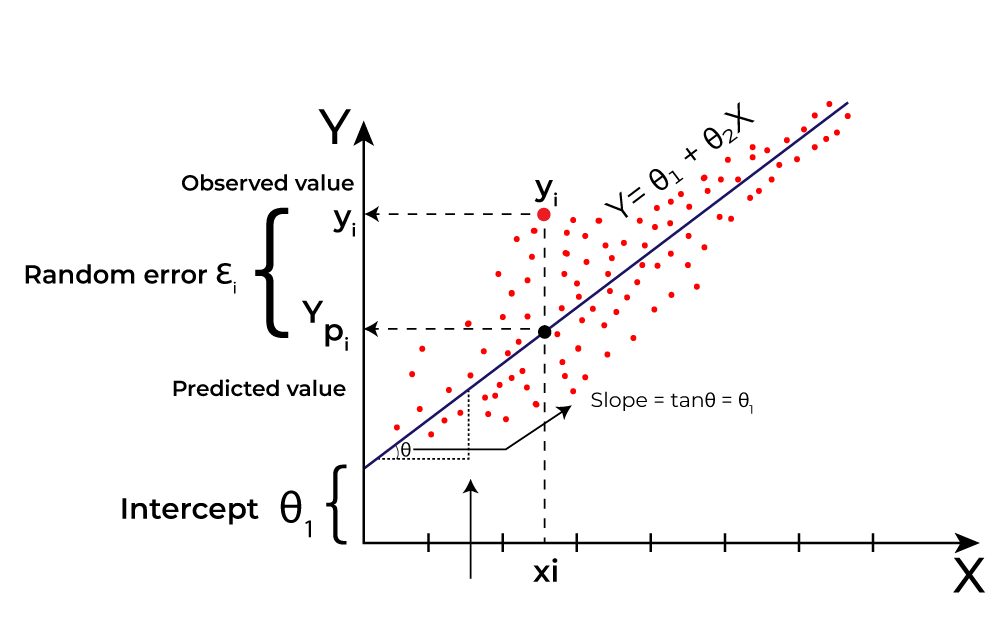

# 1. Import Python Modules

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations and working with arrays
import pandas as pd  # For handling data in tabular form (DataFrames)
import matplotlib.pyplot as plt  # For data visualization using plots
import seaborn as sns  # For statistical data visualization built on top of matplotlib
from tabulate import tabulate  # For pretty-printing tabular data in text format

# Importing classes for building custom transformers and pipelines
from sklearn.base import BaseEstimator, TransformerMixin  # Base classes to create custom transformers
from sklearn.pipeline import Pipeline  # To create a sequence of data processing steps

# Importing scalers for feature normalization
from sklearn.preprocessing import StandardScaler  # Scales features to have 0 mean and unit variance
from sklearn.preprocessing import MinMaxScaler  # Scales features to a given range (default 0 to 1)
from sklearn.preprocessing import OneHotEncoder

# Importing function to split data into training and testing sets
from sklearn.model_selection import train_test_split  # To split dataset into training and testing sets

# Importing different regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
# LinearRegression: basic linear regression model
# Lasso: Linear regression with L1 regularization
# Ridge: Linear regression with L2 regularization
# ElasticNet: Linear regression with both L1 and L2 regularization

# Importing regression evaluation metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error  
# mean_squared_error: average of the squares of errors
# root_mean_squared_error: root of MSE (used for easier interpretation)

from sklearn.metrics import r2_score  # Coefficient of determination, measures model fit quality

# 2.  Load Cars Price Dataset

In [2]:
file_path = r"cars_price.xlsx"
cars_price_df = pd.read_excel(file_path)
print(cars_price_df.columns)
cars_price_df.head()

Index(['brand_model', 'year', 'transmission', 'engine_capacity_cc',
       'distance_travelled_KM', 'features', 'product_price'],
      dtype='object')


,brand_model,year,transmission,engine_capacity_cc,distance_travelled_KM,features,product_price
0,Honda WR-V,2025,Automatic,1500,5000,RS SUV - (BEST DEAL SP),287000000
1,Honda WR-V,2025,Automatic,1500,5000,E SUV - (BEST DEAL SP),267770000
2,Honda City,2021,Automatic,1500,35000,RS Hatchback - KM 36RIBU,230000000
3,Honda WR-V,2025,Automatic,1500,5000,E SUV - (BEST DEAL SP),266700000
4,Honda Brio,2019,Automatic,1200,60000,"Satya E Hatchback - , MOBIL ISTIMEWAH ...",110000000


# 3. Basic Inspection on dataset

In [3]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(cars_price_df)

top 5 rows - using head
  brand_model  year transmission  engine_capacity_cc  distance_travelled_KM  \
0  Honda WR-V  2025    Automatic                1500                   5000   
1  Honda WR-V  2025    Automatic                1500                   5000   
2  Honda City  2021    Automatic                1500                  35000   
3  Honda WR-V  2025    Automatic                1500                   5000   
4  Honda Brio  2019    Automatic                1200                  60000   

                                    features  product_price  
0                    RS SUV - (BEST DEAL SP)      287000000  
1                     E SUV - (BEST DEAL SP)      267770000  
2                   RS Hatchback - KM 36RIBU      230000000  
3                     E SUV - (BEST DEAL SP)      266700000  
4  Satya E Hatchback - , MOBIL ISTIMEWAH ...      110000000  

bottom 5 rows using tail
      brand_model  year transmission  engine_capacity_cc  \
13822  Honda BR-V  2023    Automatic       

# 4. Handling Missing Values - Cat

In [4]:
# There is no missing values in cat columns

In [5]:
cars_price_df.drop(columns="features",inplace=True)

# 5. Categorical- Variable - Analysis -Using Pipeline

In [6]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

brand_model frequency table
+----+----------------+-----------+
|    |     Class      | Frequency |
+----+----------------+-----------+
| 0  |   Honda Brio   |   2779    |
| 1  |   Honda CR-V   |   2682    |
| 2  |   Honda HR-V   |   2582    |
| 3  |   Honda BR-V   |   1209    |
| 4  |   Honda City   |    884    |
| 5  |  Honda Civic   |    694    |
| 6  |   Honda WR-V   |    689    |
| 7  | Honda Mobilio  |    675    |
| 8  |   Honda Jazz   |    604    |
| 9  |  Honda Accord  |    484    |
| 10 |  Honda Freed   |    297    |
| 11 | Honda Odyssey  |    170    |
| 12 |   Honda S660   |    27     |
| 13 |   Honda CR-Z   |    15     |
| 14 | Honda N-Custom |    13     |
| 15 |  Honda Stream  |    11     |
| 16 |  Honda N-One   |     7     |
| 17 | Honda Elysion  |     2     |
| 18 |  Honda Legend  |     2     |
| 19 | Honda Prelude  |     1     |
+----+----------------+-----------+
brand_model Relative frequency table
+----+----------------+-----------+----------------------+
|    |     C

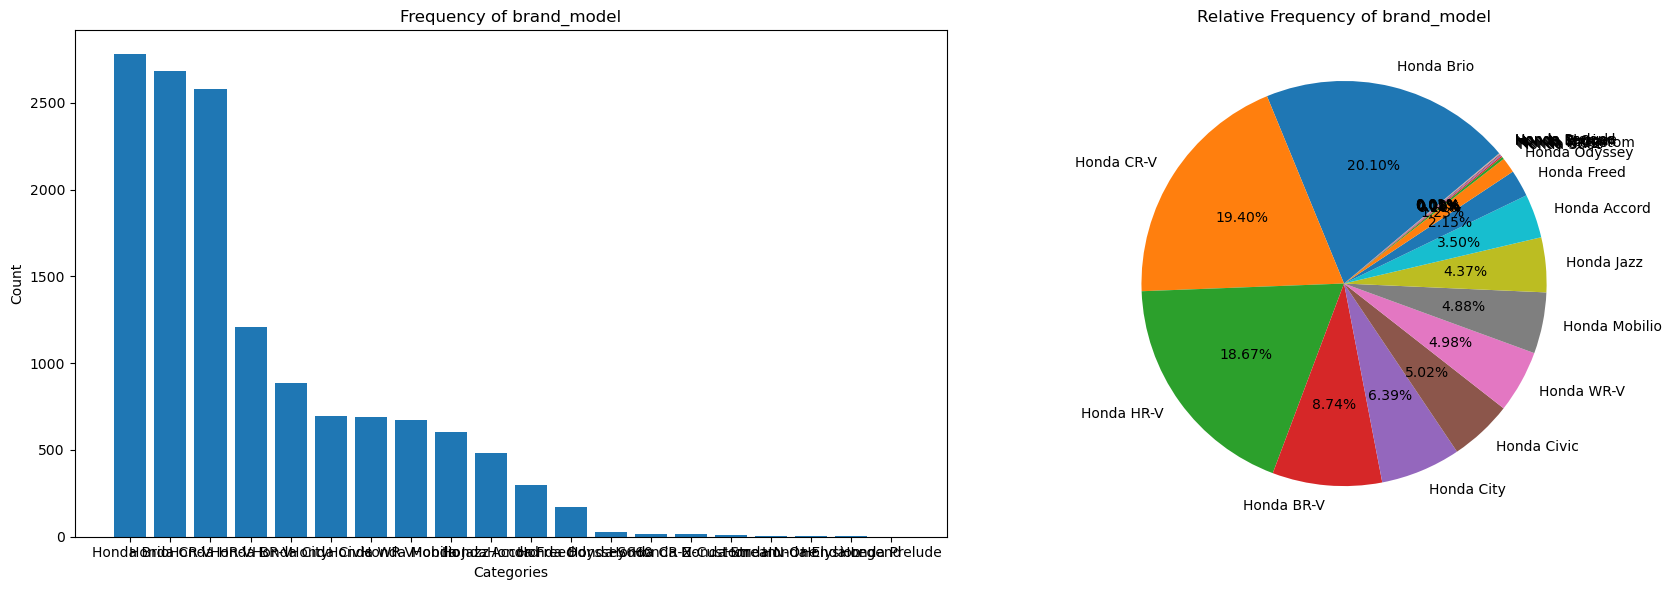

transmission frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Automatic |   13007   |
| 1 |  Manual   |    820    |
+---+-----------+-----------+
transmission Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Automatic |   13007   |        94.07         |
| 1 |  Manual   |    820    |         5.93         |
+---+-----------+-----------+----------------------+


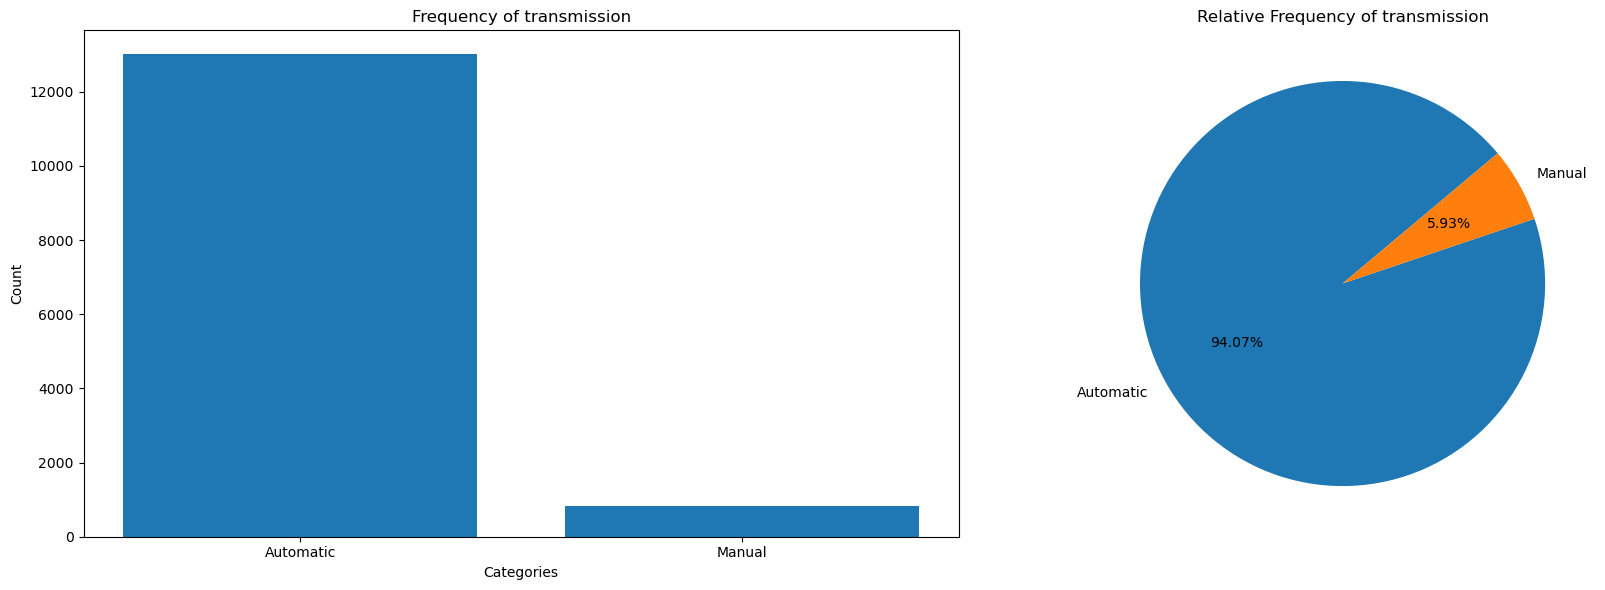

In [7]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cars_price_df)

# 6. Handling Missing Values in Numerical Columns

In [8]:
# There is no missing values in num columns

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [9]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


C:\Users\91956\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


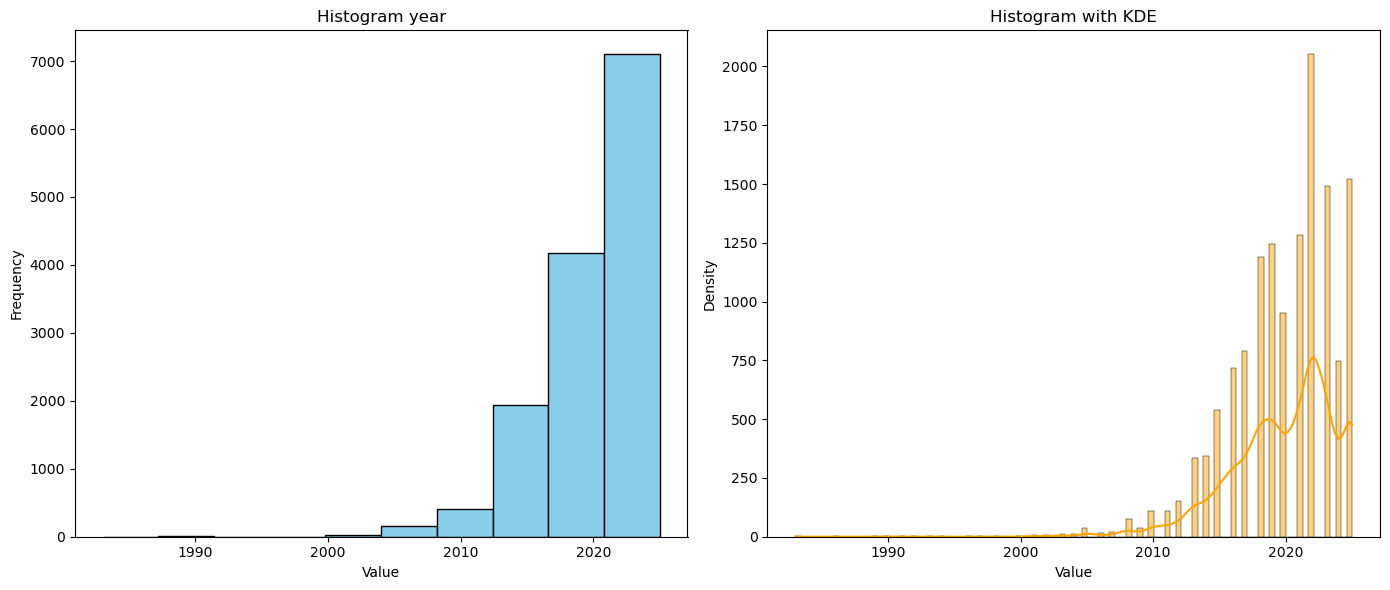

C:\Users\91956\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


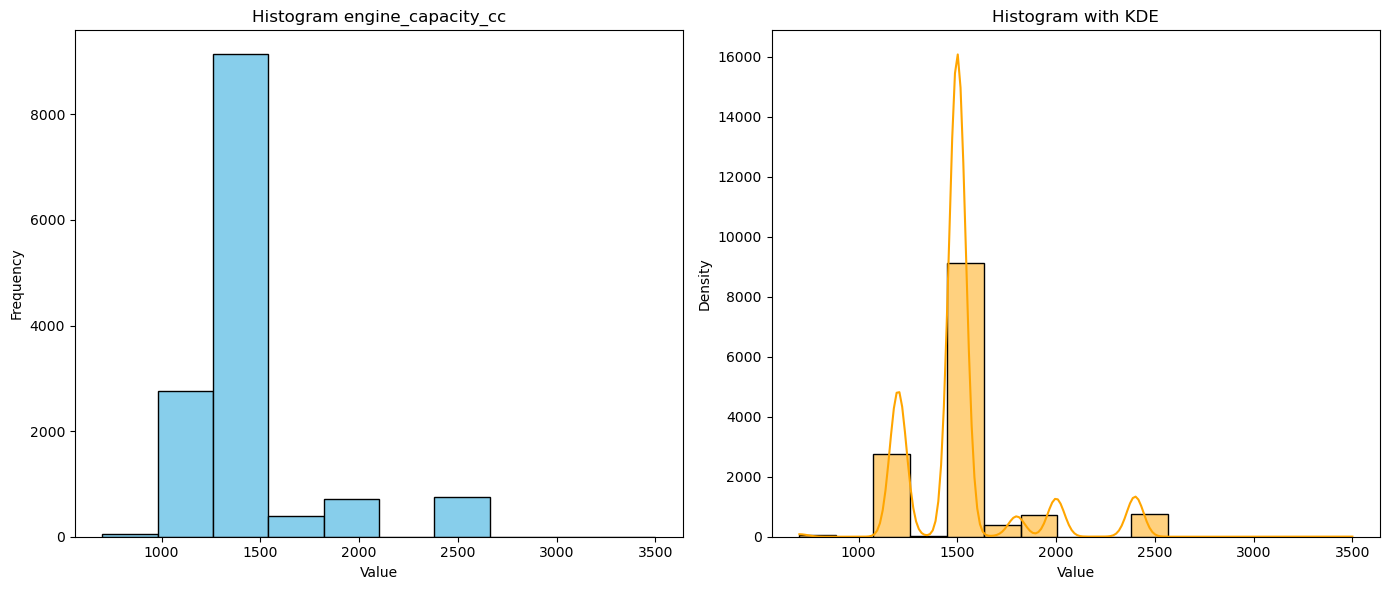

C:\Users\91956\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


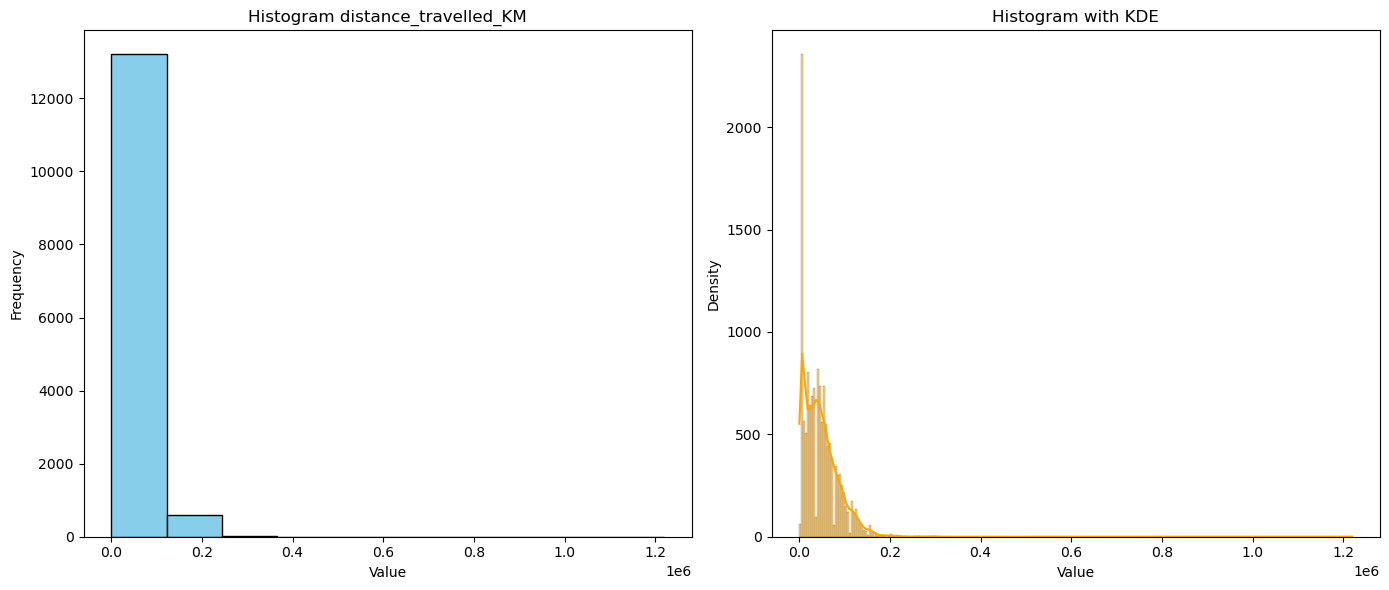

C:\Users\91956\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


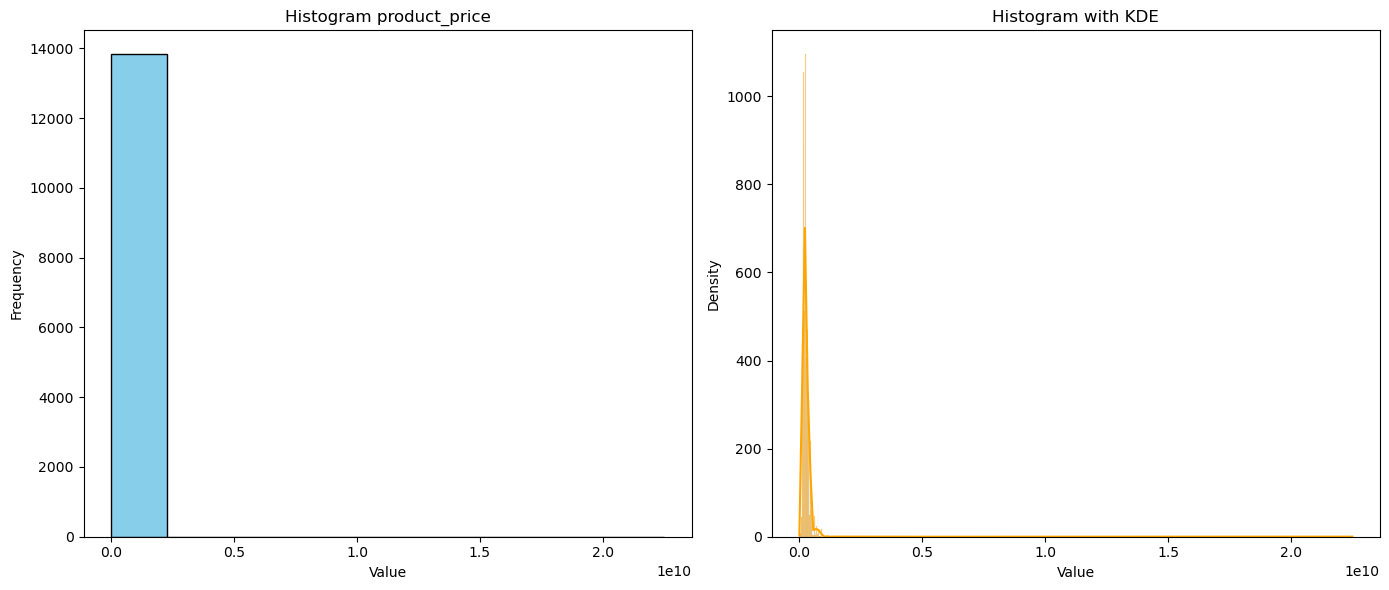

In [10]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_df)

# 8 Correlation 

In [11]:
 cars_price_df[['product_price', 'engine_capacity_cc', 'distance_travelled_KM', 'year']].corr() 

,product_price,engine_capacity_cc,distance_travelled_KM,year
product_price,1.000000,0.087843,-0.195125,0.239447
engine_capacity_cc,0.087843,1.000000,0.324835,-0.405539
distance_travelled_KM,-0.195125,0.324835,1.000000,-0.762409
year,0.239447,-0.405539,-0.762409,1.000000


In [12]:
cars_price_df.columns

Index(['brand_model', 'year', 'transmission', 'engine_capacity_cc',
       'distance_travelled_KM', 'product_price'],
      dtype='object')

# 9 One Hot Encoding

In [13]:
import pickle
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Select categorical columns
categorical_cols = ['brand_model', 'transmission']

# Fit and transform the training data
encoded_train = encoder.fit_transform(cars_price_df[categorical_cols])

# Save encoder
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
    
cars_price_df = pd.concat([
    cars_price_df.drop(categorical_cols, axis=1).reset_index(drop=True),
    pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols))
], axis=1)

# 10. Feature - Converting into Vector using TFIDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Read Excel file
df = pd.read_excel(file_path)

# Step 2: Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english',max_features=32)

# Step 3: Transform the 'features' column to TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(df['features'].astype(str))

# Step 4: Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Step 5: Concatenate TF-IDF vectors with the original DataFrame
cars_price_df = pd.concat([cars_price_df, tfidf_df], axis=1)

# 11. Numerical Column - Scaling

In [15]:
# Apply log to features: 'engine_capacity_cc', 'year', 'distance_travelled_KM'
cars_price_df[['engine_capacity_cc', 'year', 'distance_travelled_KM']] = np.log(
    cars_price_df[['engine_capacity_cc', 'year', 'distance_travelled_KM']]
)

In [16]:
cars_price_df['product_price']=np.log(cars_price_df['product_price'])

# 12. Train and Test Split

In [17]:
cars_price_df.columns

Index(['year', 'engine_capacity_cc', 'distance_travelled_KM', 'product_price',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='obj

In [18]:
X=cars_price_df.drop(['product_price'],axis='columns')
Y=cars_price_df['product_price']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 9678
test data length: 4149


Index(['year', 'engine_capacity_cc', 'distance_travelled_KM',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='object')

## 13. Linear Regression Models

In [20]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [21]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    rmse=round(root_mean_squared_error(y_test,y_pred),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
        
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', linestyle='--', label='Ideal Fit (y = x)')
    plt.xlabel('Actual log(Price)')
    plt.ylabel('Predicted log(Price)')
    plt.title(f'Actual vs Predicted log(Price) - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]
    

## 13.1 LinearRegression

columns: Index(['year', 'engine_capacity_cc', 'distance_travelled_KM',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='object')
Co

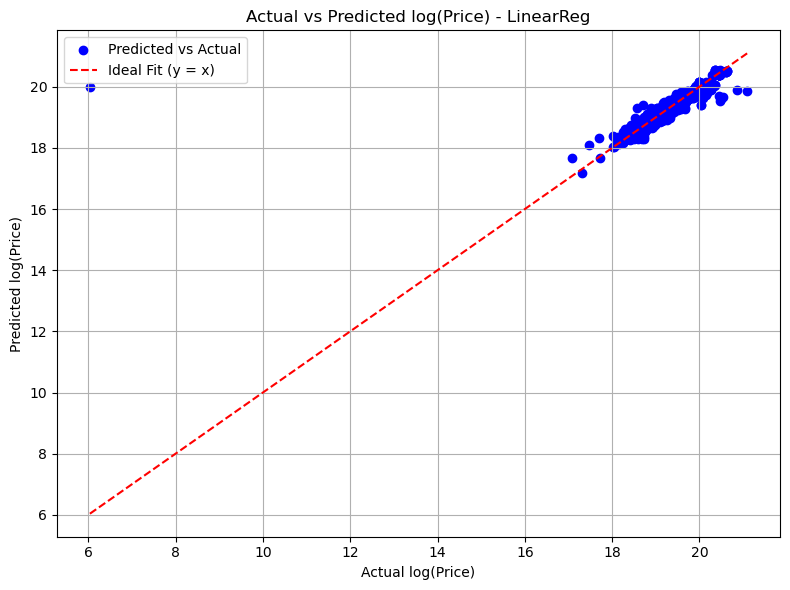

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

regression_matrix(lr ,X_train,X_test,y_test, "LinearReg")


## 13.2 Lasso Regression - L1 

columns: Index(['year', 'engine_capacity_cc', 'distance_travelled_KM',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='object')
Co

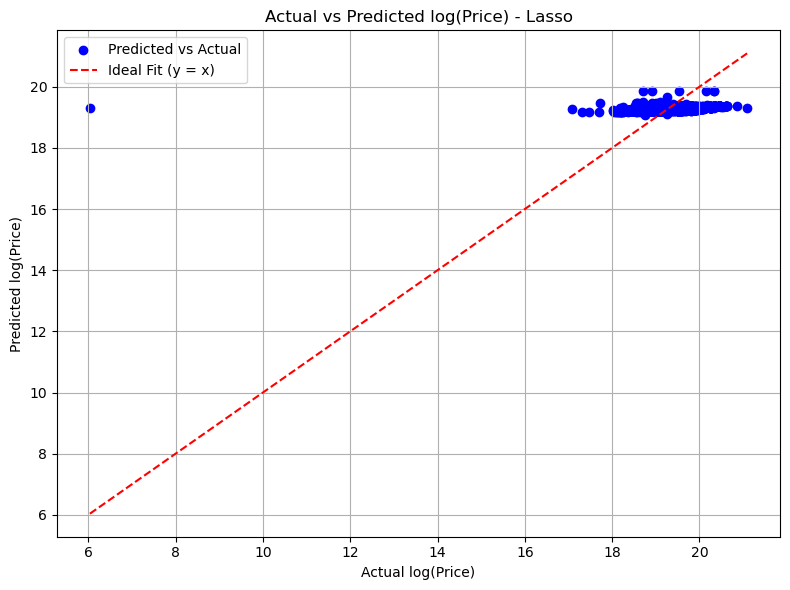

In [23]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_test, "Lasso")

## 13.2  Ridge Regression -L2

columns: Index(['year', 'engine_capacity_cc', 'distance_travelled_KM',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='object')
Co

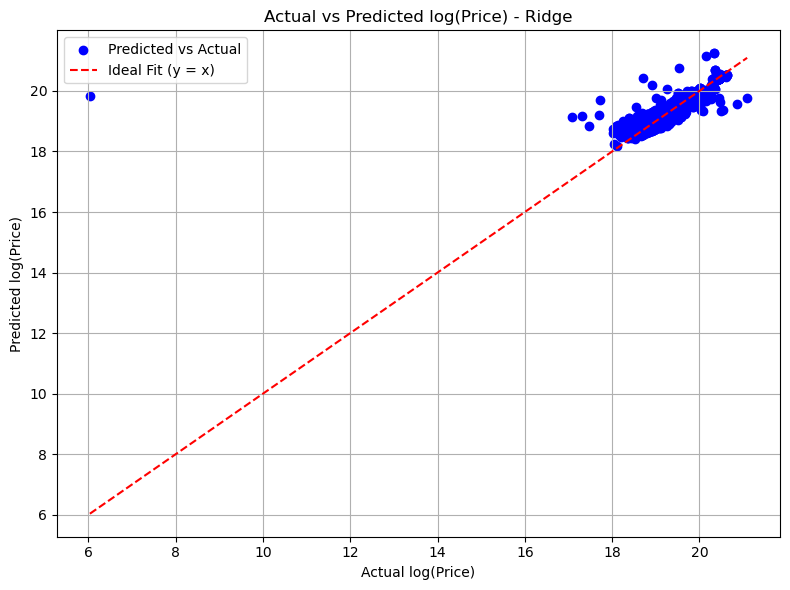

In [24]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_test, "Ridge")

## 13.3 Elastic Net 

columns: Index(['year', 'engine_capacity_cc', 'distance_travelled_KM',
       'brand_model_Honda BR-V', 'brand_model_Honda Brio',
       'brand_model_Honda CR-V', 'brand_model_Honda CR-Z',
       'brand_model_Honda City', 'brand_model_Honda Civic',
       'brand_model_Honda Elysion', 'brand_model_Honda Freed',
       'brand_model_Honda HR-V', 'brand_model_Honda Jazz',
       'brand_model_Honda Legend', 'brand_model_Honda Mobilio',
       'brand_model_Honda N-Custom', 'brand_model_Honda N-One',
       'brand_model_Honda Odyssey', 'brand_model_Honda Prelude',
       'brand_model_Honda S660', 'brand_model_Honda Stream',
       'brand_model_Honda WR-V', 'transmission_Manual', 'abu', 'best', 'crv',
       'cvt', 'dp', 'edition', 'facelift', 'hatchback', 'hev', 'hitam',
       'honda', 'hr', 'hrv', 'km', 'low', 'matic', 'mpv', 'non', 'prestige',
       'promo', 'putih', 'rs', 'satya', 'se', 'sedan', 'sensing', 'siap',
       'special', 'suv', 'tdp', 'turbo', 'vtec'],
      dtype='object')
Co

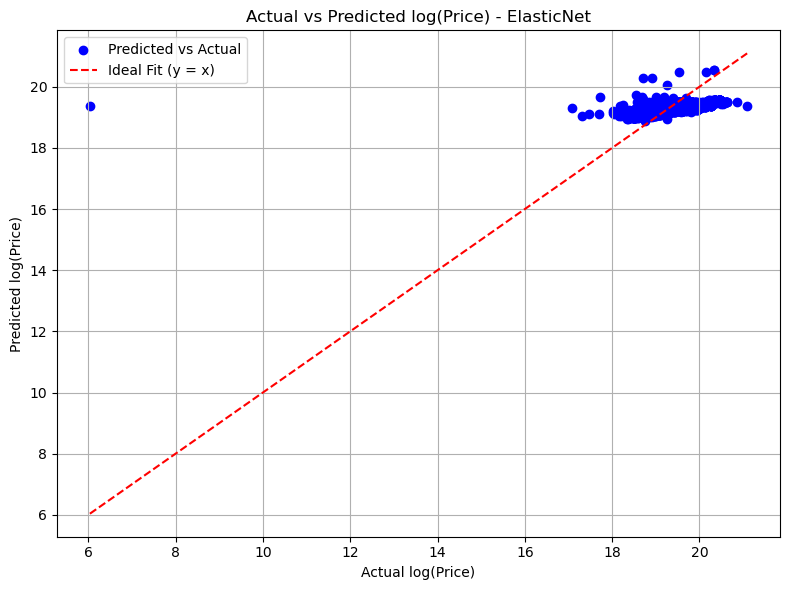

In [25]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', elastic_net.coef_)
print('Intercept:',elastic_net.intercept_)

regression_matrix(elastic_net ,X_train,X_test,y_test, "ElasticNet")

## 14. Summary


In [26]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




          LinearReg  Lasso  Ridge  ElasticNet
Train R2      0.844  0.069  0.770       0.267
Test R2       0.746  0.057  0.674       0.237
Adj R2        0.743  0.044  0.670       0.226
MSE           0.057  0.213  0.074       0.173
RMSE          0.239  0.462  0.271       0.415



+----------+-----------+-------+-------+------------+
|          | LinearReg | Lasso | Ridge | ElasticNet |
+----------+-----------+-------+-------+------------+
| Train R2 |   0.844   | 0.069 | 0.77  |   0.267    |
| Test R2  |   0.746   | 0.057 | 0.674 |   0.237    |
|  Adj R2  |   0.743   | 0.044 | 0.67  |   0.226    |
|   MSE    |   0.057   | 0.213 | 0.074 |   0.173    |
|   RMSE   |   0.239   | 0.462 | 0.271 |   0.415    |
+----------+-----------+-------+-------+------------+


# 15. Save the Model

In [27]:
import pickle
pickle.dump(lr, open('car_price_linear_reg.pkl', 'wb'))

with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

with open('tfidf_matrix.pkl', 'wb') as matrix_file:
    pickle.dump(tfidf_matrix, matrix_file)

# 16. Test the Model

In [43]:
import pickle
import pandas as pd

inputs = ["Honda WR-V", 2025,"Automatic",1500,5000 , "RS SUV - (BEST DEAL SP)"]
columns = ['brand_model', 'year', 'transmission', 'engine_cc', 'kms_driven', 'features']
# Load model and encoders
with open('car_price_linear_reg.pkl', 'rb') as f:
    model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    tfidf = pickle.load(vec_file)

with open('onehot_encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

input_df = pd.DataFrame([inputs], columns=columns)
tfidf_features = tfidf.transform(input_df['features'].astype(str)).toarray()

# One-hot encoding for categorical variables
categorical_cols = ['brand_model', 'transmission']
encoded_cats = encoder.transform(input_df[categorical_cols])

input_df['year'] = input_df['year'].astype(int)
input_df['engine_cc'] = input_df['engine_cc'].astype(float)
input_df['kms_driven'] = input_df['kms_driven'].astype(float)

# Apply log transformation
input_df['kms_driven'] = np.log(input_df['kms_driven'] )
input_df['engine_cc'] = np.log(input_df['engine_cc'] )
input_df['year'] = np.log(input_df['year'] )
numeric_cols = ['year', 'engine_cc', 'kms_driven']

final_input = pd.concat([
    input_df[numeric_cols].reset_index(drop=True),
    pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols)),
    pd.DataFrame(tfidf_features)
], axis=1)


predicted_price = model.predict(final_input.values)
print(f"Predicted Price: ₹{predicted_price[0]:,.2f}")
reversed_value = np.exp(predicted_price)

print(reversed_value)

Predicted Price: ₹19.43
[2.74361124e+08]


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
